**Клевицкий Дмитрий 13.12.24**

1) На семинаре рассмотрели применение графов для анализа фондового рынка
2) ИП: отправлен на проверку

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,<TICKER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,AFKS,220701,14.311,15.400,14.200,14.850,53456700
1,AFKS,220704,15.000,15.490,14.550,15.000,33548800
2,AFKS,220705,15.003,15.184,14.800,15.000,16770700
3,AFKS,220706,14.940,15.228,14.865,15.163,24557000
4,AFKS,220707,15.164,15.300,14.760,15.051,24990700


In [11]:
cols = []
for tick in df['<TICKER>'].unique():
    frame = df[df['<TICKER>'] == tick][['<CLOSE>']]
    frame.columns = [tick]
    frame.reset_index(inplace=True, drop=True)
    cols.append(frame)

data = pd.concat(cols, axis=1, ignore_index=False)
data.head()

,AFKS,ALRS,CHMF,FEES,FLOT,KMAZ,LKOH,LNZL,MAGN,MGNT,...,NVTK,PHOR,PIKK,ROSN,SBER,SGZH,SMLT,TATN,VTBR,YDEX
0,14.850,66.24,830.0,0.09282,42.10,89.3,3944.0,7760.0,32.380,4155.0,...,1060.2,7800.0,780.0,375.15,129.91,8.088,2798.0,422.1,87.525,1596.0
1,15.000,64.55,846.8,0.09202,40.49,91.9,3949.5,7670.0,31.310,4198.0,...,1025.0,7692.0,742.0,371.60,131.43,8.041,2739.5,433.0,92.750,1660.0
2,15.000,64.99,832.0,0.09058,40.10,89.2,4015.0,7580.0,31.095,4314.0,...,970.2,7631.0,745.3,371.50,133.50,8.172,2721.0,426.0,93.925,1701.4
3,15.163,64.96,831.2,0.08988,39.70,92.0,3962.0,8190.0,32.160,4306.0,...,1009.6,7865.0,751.5,369.65,134.00,8.090,2714.0,429.8,93.600,1655.0
4,15.051,65.35,823.8,0.09050,39.30,90.9,3956.0,8260.0,32.250,4420.0,...,998.0,7920.0,756.9,364.95,133.09,8.181,2650.0,407.9,93.675,1711.0


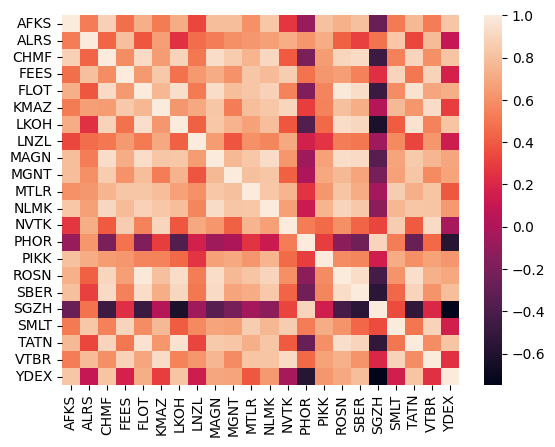

In [16]:
corr_matrix = data.corr()
sns.heatmap(data.corr());

In [15]:
import networkx as nx

In [ ]:
mask = corr_matrix[corr_matrix >= 0.8]

,AFKS,ALRS,CHMF,FEES,FLOT,KMAZ,LKOH,LNZL,MAGN,MGNT,...,NVTK,PHOR,PIKK,ROSN,SBER,SGZH,SMLT,TATN,VTBR,YDEX
AFKS,1.000000,NaN,0.873249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.802111,NaN,NaN,NaN,NaN,NaN,NaN,0.827165
ALRS,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.833043,NaN,NaN,NaN
CHMF,0.873249,NaN,1.000000,NaN,0.920349,NaN,0.884621,NaN,0.934791,0.853043,...,NaN,NaN,NaN,0.902986,0.919263,NaN,NaN,0.893622,NaN,0.822069
FEES,NaN,NaN,NaN,1.000000,NaN,0.840920,NaN,NaN,NaN,NaN,...,0.862852,NaN,NaN,NaN,NaN,NaN,0.895564,NaN,0.887569,NaN
FLOT,NaN,NaN,0.920349,NaN,1.000000,NaN,0.941135,NaN,0.935604,NaN,...,NaN,NaN,NaN,0.983439,0.937486,NaN,NaN,0.952998,NaN,NaN
KMAZ,NaN,NaN,NaN,0.840920,NaN,1.000000,NaN,NaN,0.823353,NaN,...,0.899285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.926521,NaN
LKOH,NaN,NaN,0.884621,NaN,0.941135,NaN,1.000000,NaN,0.835250,NaN,...,NaN,NaN,NaN,0.938464,0.910111,NaN,NaN,0.953684,NaN,0.816886
LNZL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAGN,NaN,NaN,0.934791,NaN,0.935604,0.823353,0.835250,NaN,1.000000,NaN,...,NaN,NaN,NaN,0.932250,0.922761,NaN,NaN,0.849806,NaN,NaN
MGNT,NaN,NaN,0.853043,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.825910,NaN,NaN


In [ ]:
G = nx.Graph()
for tick in df['<TICKER>'].unique():
    G.add_node(tick)
    
